### Airbnb Analisis, cleaning And Vizualization

<b>Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib as npl
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv("airbnb.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<b>Properties dari data pada setiap kolom

In [41]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [42]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [43]:
data.shape

(48895, 16)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

<b>jumlah data, mean, median dan standar deviasi

In [45]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<b>harga minimal dan maksimal

In [46]:
data.price.max()

10000

In [47]:
data.price.min()

0

<b>Drop kolom-kolom yang mengandung missing value yang tidak dalam diisi dengan nilai yang logis

In [48]:
data.name.isnull().sum()

16

In [49]:
data.host_name.isnull().sum()

21

In [50]:
data.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [51]:
data.dropna(how="any",subset=['name', 'host_name'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [52]:
data = data.dropna(subset=['name','host_name'])
data.name.isnull().sum()

0

In [53]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<b>missing value pada kolom last_review dengan data yang paling banyak muncul.

In [54]:
data.last_review.value_counts().idxmax()

'2019-06-23'

In [55]:
data.last_review.mode()

0    2019-06-23
Name: last_review, dtype: object

In [56]:
data.last_review.value_counts()

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     717
              ... 
2014-08-01       1
2013-07-11       1
2012-08-25       1
2015-03-05       1
2018-03-29       1
Name: last_review, Length: 1764, dtype: int64

In [57]:
data.last_review= data.last_review.fillna(data.last_review.mode()[0])
data.last_review.value_counts()

2019-06-23    11450
2019-07-01     1359
2019-06-30     1341
2019-06-24      875
2019-07-07      717
              ...  
2014-08-01        1
2013-07-11        1
2012-08-25        1
2015-03-05        1
2018-03-29        1
Name: last_review, Length: 1764, dtype: int64

<b>missing value pada kolom reviews_per_month dengan mean

In [58]:
data.reviews_per_month.isnull().sum()

10037

In [59]:
data.reviews_per_month.mean()

1.3732291800829448

In [60]:
data.reviews_per_month = data.reviews_per_month.fillna(data.reviews_per_month.mean())
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<b>Buat kategori berdasarkan Price: Cheap, Medium, dan Expensive

In [61]:
data.price.describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [62]:
# conditions = [data["price"]>175,(data["price"]<=175) &(data["price"]>=69),data["price"]<69]
# choice = ["Expensive", "Medium" ,"Cheap"]
# data["Price_CATEGORY"] = np.select(conditions,choice,default=np.nan)
# data.loc[: , ("price","Price_CATEGORY")]

data["Categorize Price"] = np.where(data["price"]>175, "Expensive",np.where((data["price"]>=69) &(data["price"]<=175), "Medium", "Cheap"))
data.loc[:,("price","Categorize Price")]

,price,Categorize Price
0,149,Medium
1,225,Expensive
2,150,Medium
3,89,Medium
4,80,Medium
...,...,...
48890,70,Medium
48891,40,Cheap
48892,115,Medium
48893,55,Cheap


<b>Filter semua data yang memiliki last_review di > 2019


In [63]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Categorize Price                   object
dtype: object

In [64]:
data.last_review = pd.to_datetime(data.last_review, errors = 'coerce')
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
Categorize Price                          object
dtype: object

In [65]:
data_above17 = data[data.last_review > "2019"]
data_above17.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Categorize Price
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373229,1,365,Medium
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Expensive
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Medium


In [66]:
data_above17.last_review.min() # melihat tahun terakhir

Timestamp('2019-01-02 00:00:00')

<b> Visualization

In [67]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Categorize Price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Medium
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373229,1,365,Medium
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373229,2,9,Medium
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373229,2,36,Cheap
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373229,1,27,Medium
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373229,6,2,Cheap


<b> Airbnb Dengan Jumlah Hotel Terbanyak

In [68]:
hotelbanyak = data["name"].value_counts()[:10].reset_index()
hotelbanyak= hotelbanyak.rename(columns={'index':'Nama Airbnb','name':'Total'})
hotelbanyak

,Nama Airbnb,Total
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11
5,Private Room,11
6,Artsy Private BR in Fort Greene Cumberland,10
7,Private room,10
8,Private room in Brooklyn,8
9,Cozy Brooklyn Apartment,8


<function matplotlib.pyplot.show(close=None, block=None)>

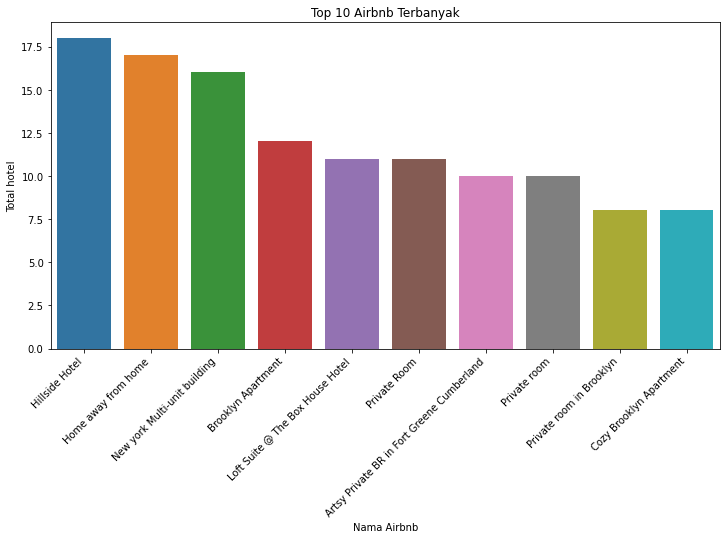

In [69]:
import seaborn as sns
fiq, ax=plt.subplots(figsize=(12,6))
sns.barplot( x= "Nama Airbnb", y= "Total", data= hotelbanyak, dodge= False)
labels = ax.get_xticklabels()

plt.setp(labels,rotation=45,horizontalalignment='right')
plt.ylabel("Total hotel")
plt.xlabel("Nama Airbnb")
plt.title("Top 10 Airbnb Terbanyak")
plt.show

<b>10 top Host terbanyak airbnb

In [70]:
topHost = data['host_name'].value_counts()[:10].reset_index()
topHost = topHost.rename(columns={'index':'host_name', 'host_name':'Counts'})

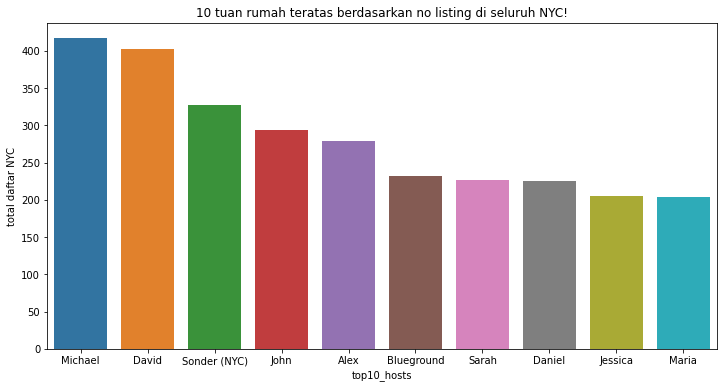

In [71]:
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x="host_name", y = "Counts", data=topHost, dodge=False)
plt.xlabel('top10_hosts')
plt.ylabel('total daftar NYC')
plt.title('10 tuan rumah teratas berdasarkan no listing di seluruh NYC!')
plt.show()

<b> Neighbourhood group dengan hotel airbnb terbanyak

In [72]:
data['neighbourhood_group'].value_counts().reset_index()



,index,neighbourhood_group
0,Manhattan,21643
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1089
4,Staten Island,373


Text(0.5, 1.0, '10 neighbourhood terbanyak berdasarkan daftar Airbnb')

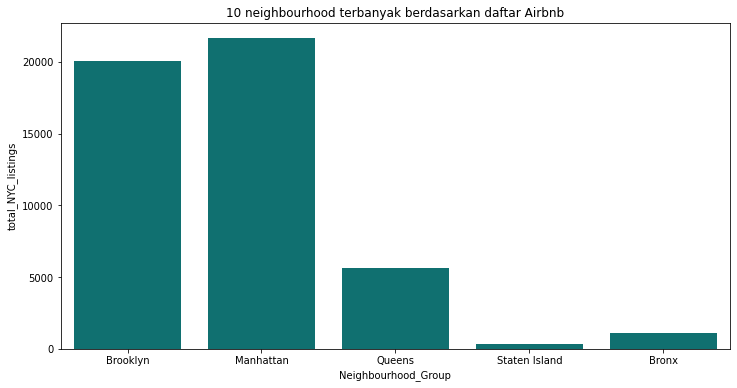

In [73]:
plt.figure(figsize= (12,6))
sns.countplot(x=data['neighbourhood_group'], color= 'teal')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('10 neighbourhood terbanyak berdasarkan daftar Airbnb')

<b>Perbandingan kategori airbnb dengan jumlah penyewa

Text(0.5, 1.0, 'visualisasi jumlah price category')

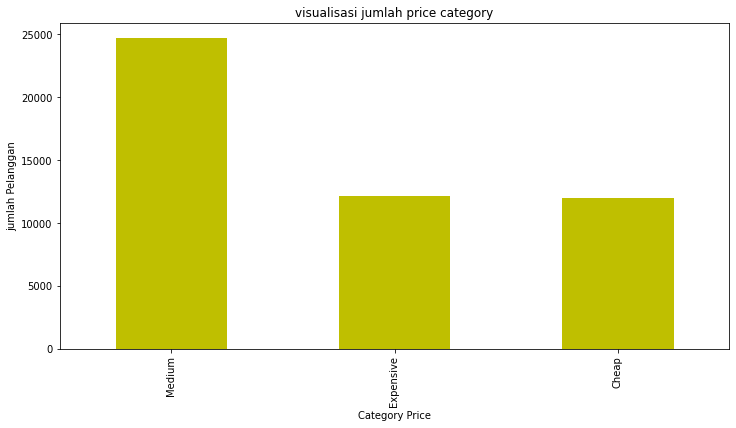

In [74]:
plt.figure(figsize= (12,6))
data['Categorize Price'].value_counts().plot(kind='bar',color='y')
plt.xlabel('Category Price')
plt.ylabel('jumlah Pelanggan')
plt.title('visualisasi jumlah price category')

In [75]:
categorizeValue= data['Categorize Price'].value_counts()
categorizeValue


Medium       24703
Expensive    12167
Cheap        11988
Name: Categorize Price, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

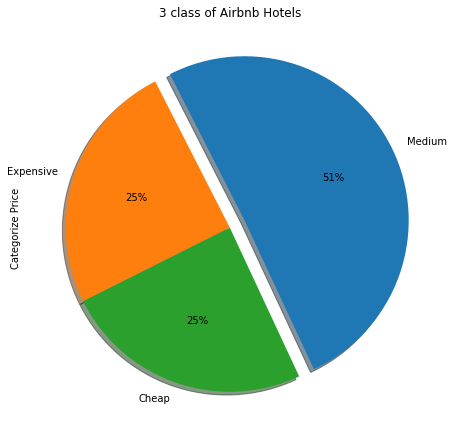

In [76]:
fig, ax = plt.subplots(figsize=(30,6))
explode = (0.1, 0, 0,)
categorizeValue.plot(kind="pie",autopct= '%1.0f%%',explode=explode,shadow=True, startangle=295)
plt.tight_layout()
ax.set_title('3 class of Airbnb Hotels')
plt.show


<b>Rincian golongan harga pada categorize price

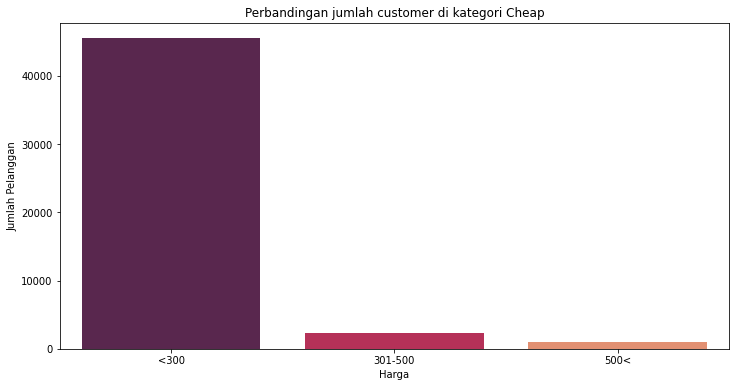

In [91]:
hargabawah= data['price'][data.price <=300]
hargatengah= data['price'][(data.price >300) & (data.price <=500)]
hargaatas= data['price'][data.price >500]

x=["<300", "301-500", "500<"]
y = [len(hargabawah.values),len(hargatengah.values),len(hargaatas.values)]

plt.figure(figsize= (12,6))
sns.barplot(x=x,y=y, palette="rocket")
plt.title("Perbandingan jumlah customer di kategori Cheap")
plt.xlabel("Harga")
plt.ylabel("Jumlah Pelanggan")
plt.show()


<b>Distribusi pelanggan berdasarkan harga airbnb

In [98]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Categorize Price'],
      dtype='object')

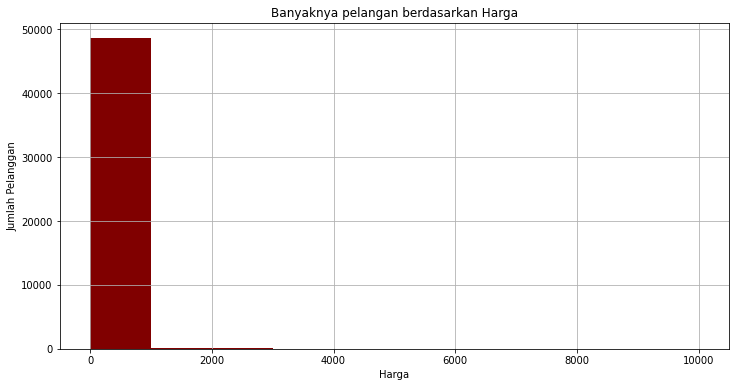

In [9]:
plt.figure(figsize= (12,6))
plt.hist(data['price'],color="maroon")
plt.xlabel('Harga')
plt.ylabel('Jumlah Pelanggan')
plt.title('Banyaknya pelangan berdasarkan Harga')
plt.grid(True)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


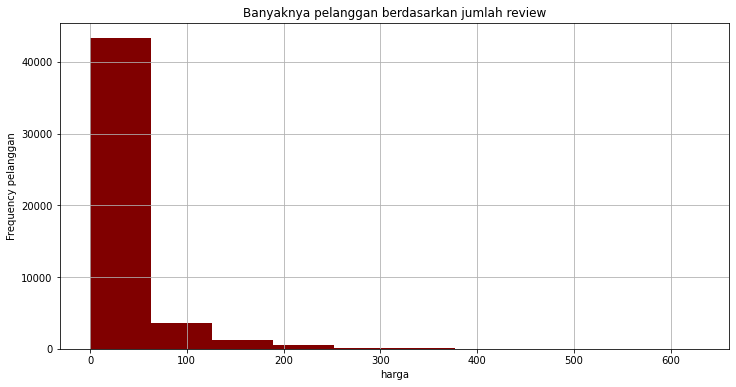

In [11]:
plt.figure(figsize= (12,6))
print(data['number_of_reviews'].plot.hist(color="maroon"))
plt.xlabel('harga')
plt.ylabel('Frequency pelanggan')
plt.title('Banyaknya pelanggan berdasarkan jumlah review')
plt.grid(True)

<b>Tren jumlah review dari tahun Ke tahun

In [112]:
data.last_review.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: last_review, Length: 48858, dtype: bool

In [123]:
review= data.groupby("last_review")["number_of_reviews"].sum().reset_index()
review

,last_review,number_of_reviews
0,2011-03-28,1
1,2011-04-25,14
2,2011-05-12,2
3,2011-09-18,9
4,2011-09-19,1
...,...,...
1759,2019-07-04,18332
1760,2019-07-05,32856
1761,2019-07-06,30740
1762,2019-07-07,36358


In [128]:
review.last_review.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1759    False
1760    False
1761    False
1762    False
1763    False
Name: last_review, Length: 1764, dtype: bool

Text(0.5, 1.0, 'Jumlah review dari tahun ke tahun')

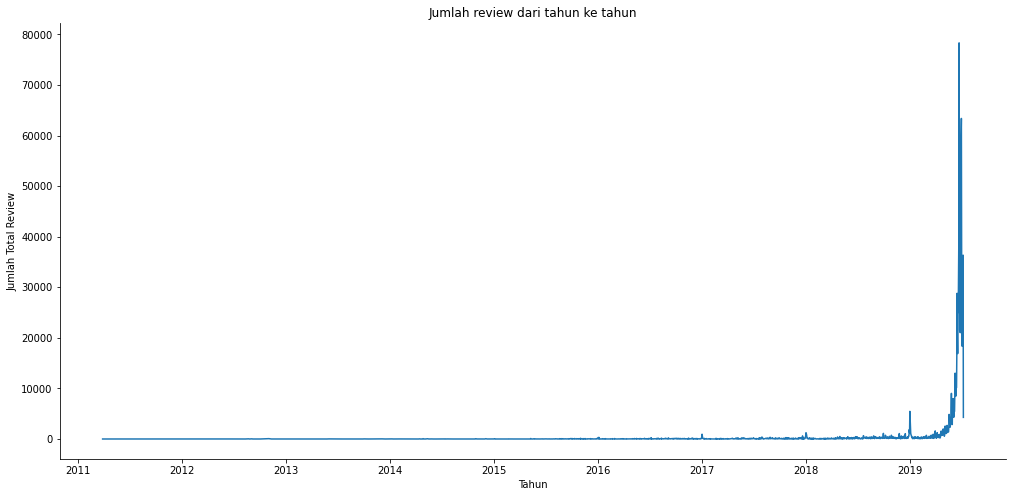

In [127]:
tren=sns.relplot(x="last_review", y="number_of_reviews", kind="line",data=review, ci=None, height=3)
tren.fig.set_size_inches(20,8)
plt.ylabel("Jumlah Total Review")
plt.xlabel("Tahun")
plt.title("Jumlah review dari tahun ke tahun")

<b> Perbandingan Harga dengan Kamar Yang Tersedia

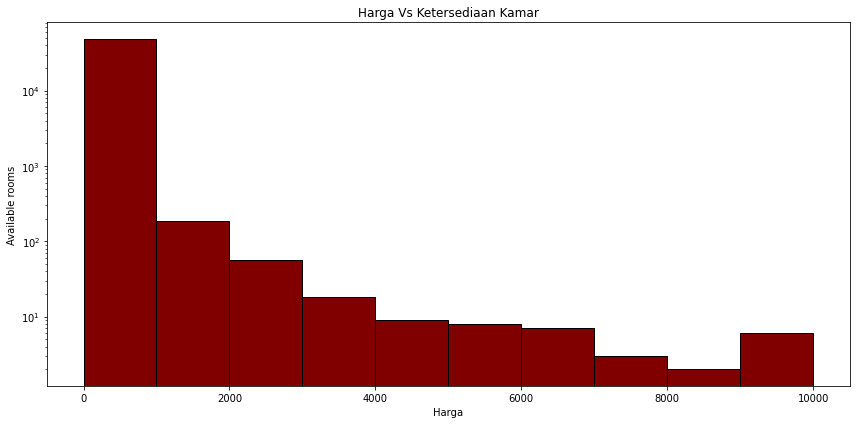

In [3]:
plt.figure(figsize= (12,6))
plt.hist(data.price,edgecolor ='k' ,log = True, color='maroon')
plt.title("Harga Vs Ketersediaan Kamar")
plt.xlabel("Harga")
plt.ylabel("Available rooms")
plt.tight_layout()
plt.show()